### This is second part of my yelp notebook, here I will make a system which rates the given review. It will rate the review on stars, 1 to 5

In [28]:
# Let us import thr libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
# let us get the dataset 
dataset = pd.read_csv('yelp.csv')

In [30]:
dataset.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


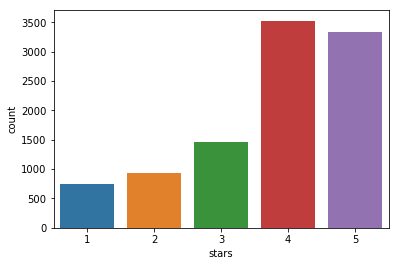

In [31]:
#Let us see the distribution of stars
sns.countplot(x='stars', data=dataset)

In [66]:
message = dataset['text'].iloc[0]

In [67]:
message

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

In [68]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [69]:
import string

In [70]:
message = [w for w in message if w not in string.punctuation]
message = ''.join(message)

In [71]:
message

'My wife took me here on my birthday for breakfast and it was excellent  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure  Our waitress was excellent and our food arrived quickly on the semibusy Saturday morning  It looked like the place fills up pretty quickly so the earlier you get here the better\n\nDo yourself a favor and get their Bloody Mary  It was phenomenal and simply the best Ive ever had  Im pretty sure they only use ingredients from their garden and blend them fresh when you order it  It was amazing\n\nWhile EVERYTHING on the menu looks excellent I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete  It was the best toast Ive ever had\n\nAnyway I cant wait to go back'

In [72]:
message = [ps.stem(w) for w in message.split() if w not in stopwords.words('english')]

In [73]:
message

['My',
 'wife',
 'took',
 'birthday',
 'breakfast',
 'excel',
 'the',
 'weather',
 'perfect',
 'made',
 'sit',
 'outsid',
 'overlook',
 'ground',
 'absolut',
 'pleasur',
 'our',
 'waitress',
 'excel',
 'food',
 'arriv',
 'quickli',
 'semibusi',
 'saturday',
 'morn',
 'It',
 'look',
 'like',
 'place',
 'fill',
 'pretti',
 'quickli',
 'earlier',
 'get',
 'better',
 'Do',
 'favor',
 'get',
 'bloodi',
 'mari',
 'It',
 'phenomen',
 'simpli',
 'best',
 'ive',
 'ever',
 'Im',
 'pretti',
 'sure',
 'use',
 'ingredi',
 'garden',
 'blend',
 'fresh',
 'order',
 'It',
 'amaz',
 'while',
 'everyth',
 'menu',
 'look',
 'excel',
 'I',
 'white',
 'truffl',
 'scrambl',
 'egg',
 'veget',
 'skillet',
 'tasti',
 'delici',
 'It',
 'came',
 '2',
 'piec',
 'griddl',
 'bread',
 'amaz',
 'absolut',
 'made',
 'meal',
 'complet',
 'It',
 'best',
 'toast',
 'ive',
 'ever',
 'anyway',
 'I',
 'cant',
 'wait',
 'go',
 'back']

In [74]:
# Let us male a function for this whole process

In [82]:
def text_processing(message):
    message = [w for w in message if w not in string.punctuation]
    message = ''.join(message)
    return [ps.stem(w) for w in message.split() if w not in stopwords.words('english')]

In [99]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [100]:
from sklearn.pipeline import Pipeline

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
from sklearn.naive_bayes import MultinomialNB

In [103]:
X = dataset['text']
y = dataset['stars']

In [104]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [105]:
pipeline = Pipeline([('Count', CountVectorizer(analyzer=text_processing)),
                    ('model', MultinomialNB())])

In [106]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('Count', CountVectorizer(analyzer=<function text_processing at 0x000002AF0BE35488>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), prepro...izer=None, vocabulary=None)), ('model', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [107]:
predict = pipeline.predict(X_test)

In [108]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

[[ 58  32  17  69  44]
 [ 13  20  43 171  26]
 [  2   8  45 336  52]
 [  5   4  25 769 261]
 [  7   1   7 444 541]]
             precision    recall  f1-score   support

          1       0.68      0.26      0.38       220
          2       0.31      0.07      0.12       273
          3       0.33      0.10      0.16       443
          4       0.43      0.72      0.54      1064
          5       0.59      0.54      0.56      1000

avg / total       0.47      0.48      0.44      3000



In [110]:
pipeline2 = Pipeline([('bow', CountVectorizer(analyzer=text_processing)),
                    ('tfidf', TfidfTransformer()),
                    ('classifier', MultinomialNB())])

In [111]:
pipeline2.fit(X_train,y_train)
predict2 = pipeline2.predict(X_test)
print(confusion_matrix(y_test,predict2))
print(classification_report(y_test,predict2))

[[  0   0   0 178  42]
 [  0   0   0 259  14]
 [  0   0   0 419  24]
 [  0   0   0 953 111]
 [  0   0   0 660 340]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00       220
          2       0.00      0.00      0.00       273
          3       0.00      0.00      0.00       443
          4       0.39      0.90      0.54      1064
          5       0.64      0.34      0.44      1000

avg / total       0.35      0.43      0.34      3000



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
